## NumPy 入门
1. 简介
2. 数据类型及基础操作
    1. [NumPy的数据类型表格图片](http://124.220.164.99:8090/archives/python拓展之numpy#2.1-ndarray-数据类型)
    2. Ndarray 对象
    3. 创建数组
    4. Numpy数组的属性
    5. 切片与索引
    6. NumPy 数组操作
3. [NumPy 常用函数](http://124.220.164.99:8090/archives/python拓展之numpy#三、numpy的函数与常用功能)
    - [字符串函数](http://124.220.164.99:8090/archives/python拓展之numpy#3.1-numpy-字符串函数)
    1. 数组的集合操作
    2. 数学函数
    3. 统计函数
    4. 线性代数
    5. 排序与取索引函数
    6. 副本与视图
4. NumPy 和 Matplotlib 数据可视化
    - [NumPy 和 Matplotlib](http://124.220.164.99:8090/archives/python拓展之numpy#四、numpy-matplotlib)
5. 使用数组进行面向数组编程
6. 使用数组进行文件输入和输出
7. 随机漫步
    - [随机漫步的模拟](https://en.wikipedia.org/wiki/Random_walk)


# 1.简介
- NumPy(Numerical Python) 是 Python 语言的一个运行速度非常快的扩展程序库，支持大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库

- NumPy 通常与 SciPy（Scientific Python）和 Matplotlib（绘图库）一起使用， 这种组合广泛用于替代 MatLab，是一个强大的科学计算环境，有助于我们通过 Python 学习数据科学或者机器学习

    - SciPy 是一个开源的 Python 算法库和数学工具包。 SciPy 包含的模块有最优化、线性代数、积分、插值、特殊函数、快速傅里叶变换、信号处理和图像处理、常微分方程求解和其他科学与工程中常用的计算

    - Matplotlib 是 Python 编程语言及其数值数学扩展包 NumPy 的可视化操作界面。它为利用通用的图形用户界面工具包，如 Tkinter, wxPython, Qt 或 GTK+ 向应用程序嵌入式绘图提供了应用程序接口（API）

- Python 的 List 和 NumPy中的数组对比：

    - Python的列表是异构的，因此列表的元素可以包含任何对象类型。

    - NumPy数组是同质的(即数组中的数据项的类型必须一致)，只能存放同一种类型的对象，便于我们直接确定存储数组所需空间大小。数组由两部分构成：
        - 存储在连续的内存块中的**实际数据**
        - 描述实际数据的**元数据**
        NumPy 中的**大部分数组方法和函数都不会直接修改实际数据，而只能修改元数据**
    
    - Python的列表通常需要借助循环遍历元素并逐个处理，而NumPy使用了优化过的**C API**，所以运算速度很快



# 2.数据类型及基础操作

## 2.1 [NumPy的数据类型表格图片](http://124.220.164.99:8090/archives/python拓展之numpy#2.1-ndarray-数据类型)
- 📢注意：
    - 不能把复数类型转化成整型或浮点型，否则会报错 `TypeError`, 但浮点数是可以转化成复数的
- `dtype`是NumPy能与其他系统数据灵活交互的原因，因为其多种数据类型使得利用C语言或Fortran等底层语言读写数据时十分方便


|类型|类型代码|描述|
|:--:|:--:|:--:|
|int8, uint8|i1, u1|有符号和无符号的8数位整数|
|int16, uint16|i2, u2|有符号和无符号的16数位整数|
|int32, uint32|i4, u4|···|
|int64, uint64|i8, u8|···|
|float16|f2|半精度浮点数|
|float32|f4或f|标准单精度浮点数；兼容C语言float|
|float64|f8或d|标准双精度浮点数；兼容C语言double和Python float|
|float128|f16或g|拓展精度浮点数|
|complex64, complex128, complex256|c8, c16, c32|分别基于32位、64位、128位浮点数的复数|
|bool|?|布尔值，存储True或False|
|object|o|Python object类型|
|string_|S|修正的ASC II字符串类型|
|unicode_|U|修正的Unicode类型，生成一个长度为10的Unicode类型，使用“U10”|


## 2.2 Ndarray 对象
- `numpy.array(object, dtype = None, copy = True, order = None, subok = False, ndmin = 0)`

- N 维数组对象 ndarray，它是一系列同类型数据的集合，以 0 下标为开始进行集合中元素的索引

- ndarray 中的每个元素在内存中都有相同存储大小的区域

> <font color='yellow'> 参数描述：</font>
> - object 数组或嵌套的数列
>
> - dtype 数组元素的数据类型，可选。
>   - **类 dtype**的属性str中保存的是一个表示数据类型的字符串，第一个字符串描述*字节顺序*，如果需要，后面会跟着字符码和数字，用来表示存储每个数组所需的字节数
>       - 字节顺序规定了32位或64位字内部各个字节的存储顺序。对于大端顺序(big-endian)，先存放权重最高的字节，用 `>` 指出；对于小端顺序(little-endian)，先存放权重最低的字节，用 `<` 指出
>
> - copy 对象是否需要复制，可选
>
> - order 创建数组的样式，C为行方向，F为列方向，A为任意方向（默认）
> 
> - subok 默认返回一个与基类类型一致的数组
>
> - ndmin 指定生成数组的最小维度
>
> - 补充：除了上述属性外，ndarray类型还有很多属性：
>   - `size` 属性保存元素数量
>   - `itemsize` 属性返回数组中各元素所占用的字节数
>   - `T` 属性的作用与 `transpose()` 函数相同
>   - `flat` 属性可返回一个 `numpy.flatier` 对象，这是获得 `flatier` 对象的唯一方法。我们可使用 `flat` 的迭代器来遍历数组，要注意的是：如果用 `flat` 属性迭代赋值，则该值会覆盖这个数组内的所有元素的值

<font color='yellow'>下列为常见的数据类型及其字符码：(注：`np.sctypeDict.keys()` 可以列出所有数据类型的字节码)</font>

|类型|字符码|
|:--:|:--:|
|整型|i|
|无符号整型|u|
|单精度浮点型|f|
|双精度浮点型|d|
|布尔型|b|
|复数型|D|
|字符串|S|
|万国码(unicode)|U|
|空类型(Void)|V|

In [1]:
import numpy as np 

# 一维，输出：[1 2 3]
a = np.array([1,2,3])  
print (a)
 
# 二维，输出：[[1, 2], [3, 4]] 
a = np.array([[1,  2],  [3,  4]])  
print (a)

# 最小维度为二维   
a = np.array([1, 2, 3, 4, 5], ndmin =  2)  
print (a)

[1 2 3]
[[1 2]
 [3 4]]
[[1 2 3 4 5]]


- NumPy数组转换成Python列表，使用函数 `tolist()` 

In [69]:
import numpy as np

b = np.array([ 1.+1.j, 3.+2.j])
b.tolist()
print(b, '\n')
print(type(b))

[1.+1.j 3.+2.j] 

<class 'numpy.ndarray'>


- `astype()` 函数可以把数组元素转换成指定类型


In [ ]:
import numpy as np

b = np.array([ 1.+1.j, 3.+2.j])
b.astype(int)                           # 当 complex 类型转换成 int 类型时，虚部被丢弃，此时会有ComplexWarning
print(b, '\n')
print(type(b))

b.astype('complex')                     # 将数据类型的名字以字符串的形式传递给 astype() 函数
print(b, '\n')
print(type(b))

## 2.3 创建数组

> ##### ndarray 数组除了可以使用底层 ndarray 构造器来创建外，也可以通过以下几种方式来创建:
> 
> - `numpy.empty(shape, dtype = float, order = 'C')`
>
> - `numpy.zeros(shape, dtype = float, order = 'C')`
>
> - `numpy.ones(shape, dtype = None, order = 'C')`
>
> - `numpy.asarray(a, dtype = None, order = None)`
>
> - `numpy.arange(start, stop, step, dtype)`
>
> - `np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)`
>
> - `np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)`

- `numpy.empty(shape, dtype = float, order = 'C')` 创建一个**指定形状（shape）、数据类型（dtype）且未初始化**的数组：

In [3]:
# 数组元素为随机值，因为它们未初始化。

import numpy as np 
x = np.empty([3,2], dtype = int) 
print (x)


[[-9223372036854775808 -9223372036854775808]
 [                   3                    0]
 [                   0      844424930131968]]


- `numpy.zeros(shape, dtype = float, order = 'C')` 创建**指定大小的数组，数组元素以 0 来填充**：

In [ ]:
# 设置类型为整数

y = np.zeros((5), dtype = int) 
print(y)


- `numpy.ones(shape, dtype = None, order = 'C')` 创建**指定形状的数组，数组元素以 1 来填充**：

In [ ]:
# 默认为浮点数，输出为：[1. 1. 1. 1. 1.]

x = np.ones(5) 
print(x)


- `numpy.asarray(a, dtype = None, order = None)` 

- 参数a可以是任意形式的输入参数：列表, 列表的元组, 元组, 元组的元组, 元组的列表，多维数组

In [5]:

x =  [1,2,3] 
a = np.asarray(x)  
print (a)


[1 2 3]


- `numpy.arange(start, stop, step, dtype)` 创建**数值范围**并返回 ndarray 对象

In [ ]:
# dtype	返回ndarray的数据类型，如果没有提供，则会使用输入数据的类型。

# 生成 0 到 5 的数组: 
x = np.arange(5)  
print (x)

# 设置了起始值、终止值及步长：
x = np.arange(10, 20, 2)  
print (x)


- `np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)` 创建一个**由等差数列构成的一维数组**

- num 要生成的等步长的样本数量，默认为50
- endpoint 该值为 true 时，数列中包含stop值，反之不包含，默认是True。
- retstep 如果为 True 时，生成的数组中会显示间距，反之不显示。

In [ ]:
# 返回浮点数，输出：[10. 12. 14. 16. 18.]

a = np.linspace(10, 20,  5, endpoint =  False)  
print(a)


- `np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)` 创建一个**等比数列**

In [ ]:
# 默认底数是 10

a = np.logspace(1.0,  2.0, num =  10)  
print (a)


## 2.4 NumPy 数组的属性
- NumPy 数组的维数称为秩（rank），秩就是轴（axis）的数量，即数组的维度（dimensions）
- 一维数组的秩为1，二维数组的秩为2，以此类推
- [重要属性表格图片](http://124.220.164.99:8090/archives/python拓展之numpy#2.4-numpy-数组属性)


In [ ]:
import numpy as np 
 
a = np.arange(24)  
print (a.ndim)             # a 现只有一个维度
# 现在调整其大小
b = a.reshape(2,4,3)       # b 现在拥有三个维度
print (b.ndim)
print (b.shape)            # 输出：(2, 4, 3)

print (b)
""" 输出：[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]] """


## 2.5 索引与切片
<font color='red'>📢注意：区别于Python内建列表，数组的切片是原数组的视图，任何对于视图的修改都会反映到原数组上。</font>
如果需要对数据的拷贝而不是一份视图的话，则需命令 `arr[start:end].copy()`
- 标量索引：ndarray 数组可以基于0-n的下标进行索引，切片对象可以通过内置的 slice 函数

- 整数数组索引

- 布尔索引

- 花式索引

- 神奇索引（类似于广播机制）


### 2.5.1 标量索引

In [ ]:
import numpy as np
 
# 一维数组 
a = np.arange(10)
s = slice(2, 7, 2)      # slice(start, stop, step)
b = a[2:7:2]
# 使用 slice 函数和直接对数组进行索引切片所的结果一致
print(b == a[s])        # 输出为：[ True  True  True]

# 多维数组
a = np.array([[1,2,3], [3,4,5], [4,5,6]])
print(a)
print('从数组索引 a[1:] 处开始切割')
print(a[1:])

""" 输出：
[[3 4 5]
 [4 5 6]] """


### 2.5.2 整数数组索引

In [ ]:
import numpy as np 
 
x = np.array([[1,  2], [3,  4], [5,  6]]) 
y = x[[0,1,2], [0,1,0]]         # 获取(0, 0)、(1, 1)、(2, 0)位置的元素
print(y)                        # 输出为：[1 4 5]


### 2.5.3 布尔索引

*提醒：使用布尔值索引选择数据时，总是生成数据的拷贝，即使返回的数组并没有任何变化

In [ ]:
import numpy as np 
 
x = np.array([[  0,  1,  2],[  3,  4,  5],[  6,  7,  8],[  9,  10,  11]])  
print ('原数组是：')
print (x)
print ('\n')
# 现在我们会打印出大于 5 的元素  
print  ('大于 5 的元素是：')
print (x[x > 5])                # 输出为：[ 6  7  8  9 10 11]


In [21]:
import numpy as np

#考虑以下例子：
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)    # 这里注意：布尔值数组的长度必须和数组轴长度一样，但不一样时也不会报错
print(names)
print('\n', data)
print("\n{:=^60}".format('布尔数组索引'))

# 假设每个人名都和data数组中的一行相对应，并且我们想要选中所有的'Bob'的对应行
print(names=='Bob')
print("\n数组元素依次与字符串Bool后结果: ", '\n', data[names=='Bob'])
print("\n除了该字符串以外的其他数组元素: ", '\n', data[~(names=='Bob')])
print("\n布尔数值索引切片: ", '\n', data[names=='Bob', :2])
data[names!='Joe'] = 7
print("\n将除了\'Joe\'以外的数组元素设置为其他数值: ", '\n', data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']

 [[-1.03021516 -0.1730477  -1.93850598  0.13185043]
 [ 0.21355913 -0.08897823 -0.06255113  0.39975208]
 [-1.79035865 -0.32896284 -1.19485915  0.08200012]
 [-0.55033204  0.55214462 -0.3753065   0.6927362 ]
 [ 0.67479132 -0.28215896 -1.76118622 -1.5184324 ]
 [-1.11428434  0.77507083 -0.79592785 -1.62213746]
 [ 0.62845594  1.28303931  0.40915597  0.22876348]]

===========================布尔数组索引===========================
[ True False False  True False False False]

数组元素依次与字符串Bool后结果:  
 [[-1.03021516 -0.1730477  -1.93850598  0.13185043]
 [-0.55033204  0.55214462 -0.3753065   0.6927362 ]]

除了该字符串以外的其他数组元素:  
 [[ 0.21355913 -0.08897823 -0.06255113  0.39975208]
 [-1.79035865 -0.32896284 -1.19485915  0.08200012]
 [ 0.67479132 -0.28215896 -1.76118622 -1.5184324 ]
 [-1.11428434  0.77507083 -0.79592785 -1.62213746]
 [ 0.62845594  1.28303931  0.40915597  0.22876348]]

布尔数值索引切片:  
 [[-1.03021516 -0.1730477 ]
 [-0.55033204  0.55214462]]

将除了'Joe'以外的数组元素

### 2.5.4 神奇索引
*神奇索引*是NumPy中的术语，用于描述使用整数数组进行数据索引；它总是将数据复制到一个新的数组中。

In [25]:
import numpy as np

arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
print(arr)

# 为选取一个特定序列的子集，可以通过传递一个包含指明所需顺序的列表或数组完成
print('\n', arr[[4, 5, 6, 7]])
print('\n', arr[[4, 5, 6, 7], [-1, -2, -3, -4]])

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]

 [[4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]

 [4. 5. 6. 7.]


In [29]:
import numpy as np

arr = np.arange(32).reshape((8, 4))
print("原数组: \n", arr)
print('\n', "根据传入的列表或数组选择特定序列: \n", arr[[1, 5, 7, 2], [0, 3, 1, 2]])
print('\n', "选择矩阵中行列的子集所形成的矩形区域: \n", arr[[1, 5, 7, 2]][:, [0,  3, 1, 2]])

原数组: 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]

 根据传入的列表或数组选择特定序列: 
 [ 4 23 29 10]

 选择矩阵中行列的子集所形成的矩形区域: 
 [[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


## 2.6 NumPy 数组操作
- `np.nditer()` 迭代数组

- Numpy 的广播机制

- 数组的基本操作

### 2.6.1 风格排序、迭代数组

In [18]:
import numpy as np 
 
a = np.arange(0,60,5) 
a = a.reshape(3,4)  

print ('原始数组是：')
print (a)
print ('\n')

print ('以 C 风格顺序排序：')       # 以行优先、依次展开
for x in np.nditer(a, order =  'C'):  
    print (x, end=", " )
print ('\n')

print ('以 F 风格顺序排序：')       # 以列优先、依次展开
for x in np.nditer(a, order =  'F'):  
    print (x, end=", " )


原始数组是：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


以 C 风格顺序排序：
0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 

以 F 风格顺序排序：
0, 20, 40, 5, 25, 45, 10, 30, 50, 15, 35, 55, 

### 2.6.2 广播机制
- 若在每个维度上两数组都有同样形状，即 ***a.shape == b.shape***，则a*b的结果就是a与b数组对应位相乘
- 若否，则触发下列过程(广播机制)：
    - 对两个数组，分别比较他们的每一个维度：
        - 数组拥有相同形状
        - 当前维度的值相等
        - 当前维度的值有一个是 1
    - 若任一条件不满足，则抛出 “ValueError: frames are not aligned” 异常



In [ ]:
import numpy as np 
 
a = np.array([[ 0, 0, 0],
           [10,10,10],
           [20,20,20],
           [30,30,30]])
b = np.array([0,1,2])
print(a + b)

""" 输出为：
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]] """

### 2.6.3 数组的基本操作

- 修改数组形状：    
    - 不改变数据：`numpy.reshape(arr, newshape, order='C')`
    - 展平的数组拷贝：`ndarray.flatten(order='C')`
    - 拆解：`numpy.ravel()`
    - 元组指定：`numpy.shape = (val1, val2, ...)`
    - 调整大小：`numpy.resize()`

- 翻转数组
    - 对换数组的维度：`numpy.transpose(arr, axes)`
    - 交换数组的两个轴：`numpy.swapaxes(arr, axis1, axis2)`

- 修改数组维度
    - 在指定位置插入新轴：` numpy.expand_dims(arr, axis) `
    - 删除一维条目：`numpy.squeeze(arr, axis)`

- 连接数组
    - 连接形状相同的多个数组：`numpy.concatenate((a1, a2, ...), axis)`
    - 沿新轴连接数组序列：`numpy.stack(arrays, axis)`
    - 水平堆叠：`np.hstack(a1, a2)`
    - 列式叠加：`np.column_stack()`
    - 垂直堆叠：`numpy.vstack(a1, a2)`
    - 行式叠加：`np.row_stack()`
    - 深度叠加：`np.dstack()` 和 一个元组 `()`

- 分割数组
    - 沿特定轴分割：`numpy.split(ary, indices_or_sections, axis)`

- 数组元素的添加与删除
    - 在形状相同的数组末尾追加值：`numpy.append(arr, values, axis=None)`
    - 沿给定轴、给定索引位置前插入值：`numpy.insert(arr, obj, values, axis)`
    - 沿给定轴删除子数组：`numpy.delete(arr, obj, axis)`
    

#### (1) 修改数组形状

- `numpy.reshape(arr, newshape, order='C')`
    - 在不改变数据的条件下修改形状，参数如下：
    - arr：要修改形状的数组
    - newshape：整数或者整数数组，新的形状应当兼容原有形状
    - order：‘C’ – 按行，‘F’ – 按列，‘A’ – 原顺序，‘k’ – 元素在内存中的出现顺序

- `ndarray.flatten(order='C')`
    - 返回一份展平的数组深拷贝，需要重新分配内存空间，对拷贝所做的修改不会影响原始数组

In [ ]:
import numpy as np
 
a = np.arange(8).reshape(2,4)
 
print ('原数组：')
print (a)
print ('\n')
# 默认按行
 
print ('展开的数组：')
print (a.flatten())
print ('\n')
 
print ('以 F 风格顺序展开的数组：')
print (a.flatten(order = 'F'))


- `ravel()`
    - 拆解：将多维数组变成一维数组，返回的是数组的视图

In [49]:
import numpy as np
 
b = np.arange(24).reshape(2, 3, 4)
print(b.ravel())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


- `numpy.shape = (val1, val2, ...)`
    - 元组指定形状


- `numpy.resize()`
    - 类似于 `reshape()`，但会改变所作用的数组

In [55]:
import numpy as np
 
a = np.arange(24).reshape(2, 3, 4)
b = np.arange(24).reshape(2, 3, 4)
b.shape = (6, 4)
print(b)
print('\n')


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


#### (2) 翻转数组
- `numpy.transpose(arr, axes)`
    - 对换数组的维度
    - axes：整数列表，对应维度，通常所有维度都会对换

In [1]:
import numpy as np
 
a = np.arange(12).reshape(3,4)
 
print ('原数组：')
print (a )
print ('\n')
 
print ('对换数组：')
print (np.transpose(a))


原数组：
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


对换数组：
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


- `numpy.swapaxes(arr, axis1, axis2)`
    - 交换数组的两个轴
    - arr：输入的数组
    - axis1：对应第一个轴的整数
    - axis2：对应第二个轴的整数

In [2]:
import numpy as np
 
# 创建了三维的 ndarray
a = np.arange(8).reshape(2,2,2)
 
print ('原数组：')
print (a)
print ('\n')
# 现在交换轴 0（深度方向）到轴 2（宽度方向）
 
print ('调用 swapaxes 函数后的数组：')
print (np.swapaxes(a, 2, 0))


原数组：
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


调用 swapaxes 函数后的数组：
[[[0 4]
  [2 6]]

 [[1 5]
  [3 7]]]


#### (3) 修改数组的维度
- `numpy.expand_dims(arr, axis)`
    - 过在指定位置插入新的轴来扩展数组形状
    - axis：新轴插入的位置


In [3]:
import numpy as np
 
x = np.array(([1,2],[3,4]))
 
print ('数组 x：')
print (x)
print ('\n')
y = np.expand_dims(x, axis = 0)
 
print ('数组 y：')
print (y)
print ('\n')
 
print ('数组 x 和 y 的形状：')
print (x.shape, y.shape)
print ('\n')


数组 x：
[[1 2]
 [3 4]]


数组 y：
[[[1 2]
  [3 4]]]


数组 x 和 y 的形状：
(2, 2) (1, 2, 2)




- `numpy.squeeze(arr, axis)`
    - 从给定数组的形状中删除一维的条目

In [4]:
import numpy as np
 
x = np.arange(9).reshape(1,3,3)
 
print ('数组 x：')
print (x)
print ('\n')
y = np.squeeze(x)
 
print ('数组 y：')
print (y)
print ('\n')
 
print ('数组 x 和 y 的形状：')
print (x.shape, y.shape)


数组 x：
[[[0 1 2]
  [3 4 5]
  [6 7 8]]]


数组 y：
[[0 1 2]
 [3 4 5]
 [6 7 8]]


数组 x 和 y 的形状：
(1, 3, 3) (3, 3)


#### (4) 连接数组

- `numpy.concatenate((a1, a2, ...), axis)`
    - 连接形状相同的两个或多个数组
    - a1, a2, ...：相同类型的数组
    - axis：沿着它连接数组的轴，默认为 0

In [5]:
import numpy as np
 
a = np.array([[1,2],[3,4]])
 
print ('第一个数组：')
print (a)
print ('\n')
b = np.array([[5,6],[7,8]])
 
print ('第二个数组：')
print (b)
print ('\n')
# 两个数组的维度相同
 
print ('沿轴 0 连接两个数组：')
print (np.concatenate((a,b)))
print ('\n')
 
print ('沿轴 1 连接两个数组：')
print (np.concatenate((a,b),axis = 1))


第一个数组：
[[1 2]
 [3 4]]


第二个数组：
[[5 6]
 [7 8]]


沿轴 0 连接两个数组：
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


沿轴 1 连接两个数组：
[[1 2 5 6]
 [3 4 7 8]]


- `numpy.stack(arrays, axis)`
    - arrays相同形状的数组序列
    - axis：返回数组中的轴，输入数组沿着它来堆叠

In [6]:
import numpy as np
 
a = np.array([[1,2],[3,4]])
 
print ('第一个数组：')
print (a)
print ('\n')
b = np.array([[5,6],[7,8]])
 
print ('第二个数组：')
print (b)
print ('\n')
 
print ('沿轴 0 堆叠两个数组：')
print (np.stack((a,b),0))
print ('\n')
 
print ('沿轴 1 堆叠两个数组：')
print (np.stack((a,b),1))


第一个数组：
[[1 2]
 [3 4]]


第二个数组：
[[5 6]
 [7 8]]


沿轴 0 堆叠两个数组：
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


沿轴 1 堆叠两个数组：
[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]]


- `numpy.hstack(a1, a2, ...)`
    - 是 numpy.stack 函数的变体，它通过水平堆叠来生成数组。

In [7]:
import numpy as np
 
a = np.array([[1,2],[3,4]])
 
print ('第一个数组：')
print (a)
print ('\n')
b = np.array([[5,6],[7,8]])
 
print ('第二个数组：')
print (b)
print ('\n')
 
print ('水平堆叠：')
c = np.hstack((a,b))
print (c)
print ('\n')


第一个数组：
[[1 2]
 [3 4]]


第二个数组：
[[5 6]
 [7 8]]


水平堆叠：
[[1 2 5 6]
 [3 4 7 8]]




- `np.column_stack()`
    - 列式堆叠，类似 hstack() 函数

In [ ]:
import numpy as np

oned = np.arange(2)
twice_oned = 2 * oned
print(np.column_stack((oned, twice_oned)))          # 列式堆叠
print('\n')


- `numpy.vstack(a1, a2, ...)`
    - 是 numpy.stack 函数的变体，它通过垂直堆叠来生成数组

In [9]:
import numpy as np
 
a = np.array([[1,2],[3,4]])
 
print ('第一个数组：')
print (a)
print ('\n')
b = np.array([[5,6],[7,8]])
 
print ('第二个数组：')
print (b)
print ('\n')
 
print ('竖直堆叠：')
c = np.vstack((a,b))
print (c)


第一个数组：
[[1 2]
 [3 4]]


第二个数组：
[[5 6]
 [7 8]]


竖直堆叠：
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


- `np.row_stack()`
    - 行式叠加，类似 vstack() 函数

In [61]:
import numpy as np

oned = np.arange(2)
twice_oned = 2 * oned
print(np.row_stack((oned, twice_oned)))          # 行式堆叠

[[0 1]
 [0 2]]


- `dstack()` 和 一个元组 `()`
    - 深度叠加，沿第三个轴(纵向)的方向来叠加一摞数组
    - 举例来说，我们可以在一个图像数据的二维数组上叠加另一幅图像的数据

In [ ]:
import numpy as np

a = np.arange(9).reshape(3, 3)
b = a * 2

print(np.dstack((a, b)))

#### (5) 分割数组


- `numpy.split(ary, indices_or_sections, axis)`

    - 沿特定的轴将数组分割为子数组
    
    - ary: 被分割的数组

    - indices_or_sections：如果是一个整数，就用该数平均切分，如果是一个数组，为沿轴切分的位置（左开右闭）
    
    - axis：设置沿着哪个方向进行切分，默认为 0，横向切分，即水平方向。为 1 时，纵向切分，即竖直方向

In [ ]:
import numpy as np
 
a = np.arange(9)
 
print ('第一个数组：')
print (a)
print ('\n')
 
print ('将数组分为三个大小相等的子数组：')
b = np.split(a,3)
print (b)
print ('\n')
 
print ('将数组在一维数组中表明的位置分割：')
b = np.split(a,[4,7])
print (b)


- `hsplit()`
    - 横向切分，相当于调用了参数 `axis=1` 的 `split()` 函数
- `vsplit()`
    - 纵向切分，相当于调用了参数 `axis=0` 的 `split()` 函数
- `dsplit`
    - 深度拆分
    - 📢注意：dsplit only works on arrays of 3 or more dimensions

In [ ]:
import numpy as np

a = np.arange(9).reshape(3, 3)
c = np.arange(27).reshape(3, 3, 3)

print(np.hsplit(a, 3))                  # 横向拆分
print('\n')

print(np.vsplit(a, 3))                  # 纵向拆分
print('\n')

print(np.dsplit(c, 3))                  # 深度拆分


#### (6) 数组元素的添加与删除
- `numpy.append(arr, values, axis=None)`

    - 在数组的末尾添加值。 追加操作会分配整个数组，并把原来的数组复制到新数组中。 此外，输入数组的维度必须匹配否则将生成ValueError
    
    - arr：输入数组

    - values：要向arr添加的值，需要和arr形状相同（除了要添加的轴）
    
    - axis：默认为 None。当axis无定义时，是横向加成，返回总是为一维数组！当axis有定义的时候，分别为0和1的时候。当axis有定义的时候，分别为0和1的时候（列数要相同）。当axis为1时，数组是加在右边（行数要相同）

In [ ]:
import numpy as np
 
a = np.array([[1,2,3],[4,5,6]])
 
print ('第一个数组：')
print (a)
print ('\n')
 
print ('向数组添加元素：')
print (np.append(a, [7,8,9]))
print ('\n')
 
print ('沿轴 0 添加元素：')
print (np.append(a, [[7,8,9]],axis = 0))
print ('\n')
 
print ('沿轴 1 添加元素：')
print (np.append(a, [[5,5,5],[7,8,9]],axis = 1))


- `numpy.insert(arr, obj, values, axis)`

    - 在给定索引之前，沿给定轴在输入数组中插入值。插入没有原地的，函数会返回一个新数组。此外，如果未提供轴，则输入数组会被展开

    - arr：输入数组

    - obj：在其之前插入值的索引

    - values：要插入的值

    - axis：沿着它插入的轴，如果未提供，则输入数组会被展开

In [ ]:
import numpy as np
 
a = np.array([[1,2],[3,4],[5,6]])
 
print ('第一个数组：')
print (a)
print ('\n')
 
print ('未传递 Axis 参数。 在删除之前输入数组会被展开。')
print (np.insert(a,3,[11,12]))
print ('\n')
print ('传递了 Axis 参数。 会广播值数组来配输入数组。')
 
print ('沿轴 0 广播：')
print (np.insert(a,1,[11],axis = 0))
print ('\n')
 
print ('沿轴 1 广播：')
print (np.insert(a,1,11,axis = 1))


- `numpy.delete(arr, obj, axis)`

    - 返回从输入数组中删除指定子数组的新数组，如果未提供轴参数，则输入数组将展开

    - arr：输入数组

    - obj：可以被切片，整数或者整数数组，表明要从输入数组删除的子数组

    - axis：沿着它删除给定子数组的轴，如果未提供，则输入数组会被展开
    

In [ ]:
import numpy as np
 
a = np.arange(12).reshape(3,4)
 
print ('第一个数组：')
print (a)
print ('\n')
 
print ('未传递 Axis 参数。 在插入之前输入数组会被展开。')
print (np.delete(a,5))
print ('\n')
 
print ('删除第二列：')
print (np.delete(a,1,axis = 1))
print ('\n')
 
print ('包含从数组中删除的替代值的切片：')
a = np.array([1,2,3,4,5,6,7,8,9,10])
print (np.delete(a, np.s_[::2]))


# 3.NumPy 常用函数

## 3.1数组的集合操作

|方法|描述|
|:---:|:---:|
|unique(x)|计算x的唯一值，并排序|
|intersect1d(x, y)|计算x和y的交集，并排序|
|union1d(x, y)|计算x和y的并集，并排序|
|in1d(x, y)|计算x中的元素是否包含在y中，返回一个布尔值数组|
|setdiff1d(x, y)|差集，在x中但不在y中的x元素|
|setxor1d(x, y)|异或集，在x或y中，但不属于x、y交集的元素|

In [16]:
import numpy as np

# 取唯一值 -> np.unique()
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
onlyOneStr =  np.unique(names)
print(onlyOneStr)

ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
onlyOneInt = sorted(set(ints))
print(onlyOneInt)

# 检查一个数组中的值是否包含在另外一个数组中，并返回一个布尔值数组 -> np.in1d
values = np.array([6, 0, 0, 3, 2, 4, 5, 6])
print(np.in1d(values, [2, 3, 6]))

['Bob' 'Joe' 'Will']
[1, 2, 3, 4]
[ True False False  True  True False False  True]


## 3.2 数学函数

In [ ]:
import numpy as np
 
a = np.array([0,30,45,60,90])
print ('不同角度的正弦值：')
# 通过乘 pi/180 转化为弧度  
print (np.sin(a*np.pi/180))
print ('\n')

print ('数组中角度的余弦值：')
print (np.cos(a*np.pi/180))
print ('\n')

print ('数组中角度的正切值：')
print (np.tan(a*np.pi/180))


 - 舍入函数

In [ ]:
import numpy as np
 
a = np.array([1.0,5.55,  123,  0.567,  25.532])  
print  ('原数组：')
print (a)
print ('\n')
print ('舍入后：')
print (np.around(a))
print (np.around(a, decimals =  1))
print (np.around(a, decimals =  -1))
#a: 数组
#decimals: 舍入的小数位数。 默认值为0。 如果为负，整数将四舍五入到小数点左侧的位置

#向下取整。
print (np.floor(a))
#向上取整。
print (np.ceil(a)) 


## 3.3 统计函数

|方法|描述|
|:---:|:---:|
|sum|沿着轴向计算所有元素的累和，0长度的数组，累积和为0|
|mean|数学平均，0长度的数组平均值为NaN|
|std, var|标准差和方差，可以选择自由度调整（默认分母是n）|
|min, max|最大值和最小值|
|argmin, argmax|最小值和最大值的位置|
|cumsum|从0开始元素累和|
|cumprod|从1开始元素累积积|

In [36]:
import numpy as np 
 
a = np.array([[3,7,5],[8,4,3],[2,4,9]])  
print ('我们的数组是：')
print (a)
print ('\n')

print ('调用 amin() 函数：')        
print (np.amin(a,1))                # 用于计算数组中的元素沿指定轴的最小值
print ('\n')

print ('调用 amax() 函数：')
print (np.amax(a))                  # 用于计算数组中的元素沿指定轴的最大值
print ('\n')

print ('再次调用 amax() 函数：')
print (np.amax(a, axis =  0))       # 0 为纵向切分，1 为横向切分(默认)


我们的数组是：
[[3 7 5]
 [8 4 3]
 [2 4 9]]
[[0 2 1]
 [2 1 0]
 [0 1 2]]


In [ ]:
import numpy as np 
 
a = np.array([[10, 7, 4], [3, 2, 1]])
print ('我们的数组是：')
print (a)
 
print ('调用 percentile() 函数：')
# 50% 的分位数，就是 a 里排序之后的中位数
print (np.percentile(a, 50)) 
 
# axis 为 0，在纵列上求
print (np.percentile(a, 50, axis=0)) 
 
# axis 为 1，在横行上求
print (np.percentile(a, 50, axis=1)) 
 
# 保持维度不变
print (np.percentile(a, 50, axis=1, keepdims=True))


In [ ]:
import numpy as np 
 
a = np.array([1,2,3,4])  
print ('我们的数组是：')
print (a)
print ('\n')

print ('调用 average() 函数：')
print (np.average(a))
print ('\n')

# 不指定权重时相当于 mean 函数
wts = np.array([4,3,2,1])  
print ('再次调用 average() 函数：')
print (np.average(a,weights = wts))
print ('\n')
# 加权平均值 = (1*4+2*3+3*2+4*1)/(4+3+2+1)


In [35]:
import numpy as np 

a = np.array([1,2,3,4])  
print('调用 median() 函数：')           # 计算数组 a 中元素的中位数（中值）
print(np.median(a))
print('\n')

b = np.array([[10, 7, 4], [3, 2, 1]])
print('调用 mean() 函数：')             # 返回数组中元素的算术平均值。如果提供了轴，则沿其计算
print(np.median(b, axis = 1))  
print('\n')

print('调用 std() 函数：')
print(np.std(a))                      # 标准差，即 std = sqrt(mean((x - x.mean())**2))
print('\n')

print('调用 var() 函数：')
print(np.var([1,2,3,4]))              # 统计中的方差（样本方差），即 mean((x - x.mean())** 2)
print('\n')


调用 median() 函数：
2.5
调用 mean() 函数：
[7. 2.]


## 3.4线性代数

- 和Matlab等其它语言相比，NumPy的线性代数中所不同的是 `*` 是矩阵的逐元素乘积而不是矩阵的点乘积。因此，NumPy的数组方法和numpy命名空间中都有一个函数 `dot`，用于矩阵操作。

- `@` 为中缀操作符，用于点乘操作
- `numpy.linalg` 拥有一个矩阵分解的标准函数集，这些函数都是通过在MATLAB和R等其它语言使用的相同的行业标准线性代数库来实现的，例如BLAS、LAPACK或英特尔专有的MKL(数学核心库)

|函数|描述|
|:---:|:---:|
|diag|将一个方阵的对角（或非对角）元素作为一位数组返回，或者将一维数组转换成一个方阵，并且在非对角线上有零点
|dot|矩阵点乘|
|trace|计算矩阵对角元素和|
|det|计算矩阵的行列式|
|eig|计算矩阵的特征值和方向向量|
|inv|计算方阵的逆矩阵|
|pinv|计算矩阵的Moore-Penrose伪逆|
|qr|计算QR分解|
|svd|计算奇异值分解|
|solve|求解x的线性系统 Ax = b，其中A是方阵|
|lstsq|计算 Ax = b的最小二乘解|

In [28]:
import numpy as np  

x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print("x.dot(y) equals to np.dot(x, y):\n", (x.dot(y) == np.dot(x, y)))
print("\nx.dot(y)为：\n", x.dot(y))
print("\nx @ y为：\n", x@y)

from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
print("\nmat的逆矩阵为：\n", inv(mat))
print("\nmat与其逆矩阵相乘结果为对角矩阵：\n", mat.dot(inv(mat)))
# 奇异矩阵
q, r = qr(mat)


x.dot(y) equals to np.dot(x, y):
 [[ True  True]
 [ True  True]]

x.dot(y)为：
 [[ 28.  64.]
 [ 67. 181.]]

x @ y为：
 [[ 28.  64.]
 [ 67. 181.]]

mat的逆矩阵为：
 [[ 0.84851568 -0.32454181 -1.05269321 -0.0795347   0.7456001 ]
 [-0.32454181  0.85694569  0.12544306  0.5582152  -0.25835292]
 [-1.05269321  0.12544306  1.99814656 -0.08681374 -1.19400536]
 [-0.0795347   0.5582152  -0.08681374  1.0617048   0.09932558]
 [ 0.7456001  -0.25835292 -1.19400536  0.09932558  0.92009588]]

mat与其逆矩阵相乘结果为对角矩阵：
 [[ 1.00000000e+00  5.18888705e-17  6.44729764e-16  4.02024398e-17
  -5.77362227e-16]
 [ 2.82527409e-16  1.00000000e+00 -1.08797655e-15  3.17536846e-16
  -4.60748090e-16]
 [-2.12292343e-17  8.32598948e-17  1.00000000e+00  1.42020892e-16
   4.22741731e-16]
 [-1.77082791e-16 -1.49354208e-16  1.88483647e-16  1.00000000e+00
  -1.01806133e-16]
 [ 2.86901838e-16  2.10591261e-16  7.12631992e-17  1.63783760e-16
   1.00000000e+00]]


## 3.5 排序与取索引

<font color = "red">📢注意：</font> `np.sort` 方法返回的是已经排序好的数组拷贝，而不是对原数组按位置排序

In [ ]:
import numpy as np  
 
a = np.array([[3,7],[9,1]])  
print ('我们的数组是：')
print (a)
print ('\n') 

print ('按列排序：')
print (np.sort(a, axis =  0))
print ('\n')


In [ ]:
import numpy as np 
 
a = np.array([[3,7,5],[8,4,3],[2,4,9]])  
print('调用函数 argsort(): ')
print(a.argsort())                      # 函数返回的是数组值从小到大的索引值
print('\n')

print('调用函数 argmin(): ')
print(a.argmin())                       # 函数分别沿给定轴返回最小元素的索引
print('\n')    

print('调用函数 argmin(): ')
print(a.argmax())                       # 函数分别沿给定轴返回最大元素的索引


In [ ]:
import numpy as np 
 
x = np.arange(9.).reshape(3,  3)  
print ('我们的数组是：')
print (x)
print('\n')

print ( '大于 3 的元素的索引：')
y = np.where(x >  3)  
print (y)
print('\n')

print ('使用这些索引来获取满足条件的元素：')
print (x[y])


In [39]:
import numpy as np 
 
x = np.arange(9.).reshape(3,  3)  
print ('我们的数组是：')
print (x)

# 定义条件, 选择偶数元素
condition = np.mod(x,2)  ==  0  

print ('按元素的条件值：')
print (condition)

print ('使用条件提取元素：')
print (np.extract(condition, x))



我们的数组是：
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
按元素的条件值：
[[ True False  True]
 [False  True False]
 [ True False  True]]
使用条件提取元素：
[0. 2. 4. 6. 8.]


## 3.6  NumPy 副本与视图

- 副本是一个数据的完整的拷贝，如果我们对副本进行修改，它不会影响到原始数据，物理内存不在同一位置，一般发生在：

    - 1. Python 序列的切片操作，调用deepCopy()函数
    - 2. 调用 ndarray 的 copy() 函数产生一个副本

- 视图是数据的一个别称或引用，通过该别称或引用亦便可访问、操作原有数据，但原有数据不会产生拷贝。如果我们对视图进行修改，它会影响到原始数据，物理内存在同一位置

    - 1. numpy 的切片操作返回原数据的视图
    - 2. 调用 ndarray 的 view() 函数产生一个视图
    

- 简单的赋值不会创建数组对象的副本。相反，它使用原始数组的相同id()来访问它。id()返回 Python 对象的通用标识符，类似于 C 中的指针

- 此外，一个数组的任何变化都反映在另一个数组上。 例如，一个数组的形状改变也会改变另一个数组的形状

- 简单的赋值

In [43]:
import numpy as np 
 
a = np.arange(6)  

print ('调用 id() 函数 -> a：')
print (id(a))
print('\n')

# 将 a 赋值给 b
b = a 
print ('b 拥有相同 id()：')
print (id(b))
print('\n')

print ('修改 b 的形状：')
b.shape =  3,2  
print (b)
print('\n')

print ('a 的形状也修改了：')
print (a)


调用 id() 函数 -> a：
140329643779152


b 拥有相同 id()：
140329643779152


修改 b 的形状：
[[0 1]
 [2 3]
 [4 5]]


a 的形状也修改了：
[[0 1]
 [2 3]
 [4 5]]


### 3.6.1 视图或浅拷贝
- ndarray.view() 方会创建一个新的数组对象，该方法创建的新数组的维数变化不会改变原始数据的维数

In [ ]:
# ndarray.view() 方会创建一个新的数组对象，该方法创建的新数组的维数变化不会改变原始数据的维数
import numpy as np 
 
# 最开始 a 是个 3X2 的数组
a = np.arange(6).reshape(3,2)  
print ('数组 a：')
print (a)
print('\n')

print ('创建 a 的视图：')
b = a.view()  
print (b)
print('\n')

print ('两个数组的 id() 不同：')
print ('a 的 id()：')
print (id(a))
print('\n')

print ('b 的 id()：' )
print (id(b))
print('\n')

# 修改 b 的形状，并不会修改 a
b.shape =  2,3
print ('b 的形状：')
print (b)
print ('a 的形状：')
print (a)
print('\n')


In [47]:
# 使用切片创建视图修改数据会影响到原始数组

import numpy as np 
 
arr = np.arange(12)
print ('我们的数组：')
print (arr)
print('\n')

print ('创建切片：')
a = arr[3:]
b = arr[3:]

# 变量 a,b 都是 arr 的一部分视图，对视图的修改会直接反映到原数据中
a[1] = 123
b[2] = 234
print(arr)
print('\n')
print(id(a),id(b),id(arr[3:]))


我们的数组：
[ 0  1  2  3  4  5  6  7  8  9 10 11]


创建切片：
[  0   1   2   3 123 234   6   7   8   9  10  11]


140329632214256 140329644478992 140329632214160


### 3.6.2 副本或深拷贝
- ndarray.copy() 函数创建一个副本。 对副本数据进行修改，不会影响到原始数据，它们物理内存不在同一位置

In [48]:
import numpy as np 
 
a = np.array([[10,10],  [2,3],  [4,5]])  

print ('创建 a 的深层副本：')
b = a.copy()  
print ('数组 b：')
print (b)
print('\n')

# b 与 a 不共享任何内容  
print ('我们能够写入 b 来写入 a 吗？')
print (b is a)
print('\n')

print ('修改 b 的内容：')
b[0,0]  =  100  
print ('修改后的数组 b：')
print (b)
print ('a 保持不变：')
print (a)


创建 a 的深层副本：
数组 b：
[[10 10]
 [ 2  3]
 [ 4  5]]


我们能够写入 b 来写入 a 吗？
False


修改 b 的内容：
修改后的数组 b：
[[100  10]
 [  2   3]
 [  4   5]]
a 保持不变：
[[10 10]
 [ 2  3]
 [ 4  5]]


## 3.7伪随机数生成

`nunpy.random` 模块填补了Python内建的 `random` 模块的不足。

|函数|描述|
|:---:|:---:|
|seed|向随机数生成器传递随机状态种子|
|permutation|返回一个序列的随机排列，或者返回一个乱序的整数范围序列|
|shuffle|随机排列一个序列|
|rand|从均匀分布中抽取样本|
|randint|根据给定的由低到高的范围抽取随机整数|
|randn|从均值0方差1的正态分布中抽取样本（MATLAB型接口）|
|binomial|从二项分布中抽取样本|
|normal|从正太（高斯）分布中抽取样本|
|beta|从beta中抽取样本|
|chisquare|从卡方分布中抽取样本|
|gamma|从伽马分布中抽取样本|
|uniform|从均匀[0,1)分布中抽取样本|

In [30]:
import numpy as np 

# 正态分布样本数组
samples = np.random.normal(size=(4, 4))

# 相较于Python内建的random模块，numpy.random在生成大型样本时快了一个数量级
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

881 ms ± 87.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
32.5 ms ± 6.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
import numpy as np 

# 设置一个非全局状态的随机种子，使数据独立于其他的随机状态
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# 4.NumPy 和 Matplotlib 数据可视化

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
 
x = np.arange(1,11) 
y =  2  * x +  5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()


In [ ]:
# 有 bug ---> ValueError: Unrecognized marker style 'ob'
import numpy as np 
from matplotlib import pyplot as plt 
 
x = np.arange(1,11) 
y =  2  * x +  5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y, marker = "ob") 
plt.show()


In [ ]:
from matplotlib import pyplot as plt 
x =  [5,8,10] 
y =  [12,16,6] 
x2 =  [6,9,11] 
y2 =  [6,15,7] 
plt.bar(x, y, align =  'center') 
plt.bar(x2, y2, color =  'g', align =  'center') 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis') 
plt.show()


In [ ]:
from matplotlib import pyplot as plt 
import numpy as np  
 
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 
plt.hist(a, bins =  [0,20,40,60,80,100]) 
plt.title("histogram") 
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一些测试数据 -- 图1
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# 创建一个画像和子图 -- 图2
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# 创建两个子图 -- 图3
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# 创建四个子图 -- 图4
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)


# 5.使用数组进行面向数组编程

    使用NumPy数组表达式来替代显式循环的方法，称为向量化。通常向量化的数组操作会比纯Python的等价实现在速度上快一到两个数量级（甚至更多）

[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

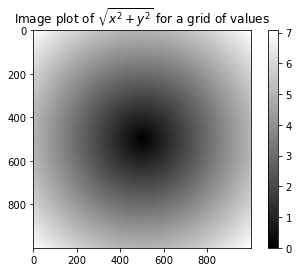

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 二元通用函数
points = np.arange(-5, 5, 0.01)     # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs ** 2 + ys ** 2)
print(z)

# 可视化
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar() # 灰度图
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")



## 5.1将逻辑条件作为数组操作
`numpy.where` 函数是三元表达式 `x if condition else y` 的向量化版

In [6]:
import numpy as np
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

# 当cond中的元素为True时，取xarr中的元素，否则取yarr中的元素
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]     # 计算量大
result = np.where(cond, xarr, yarr)
print(result)

# np.where 的第二和第三个参数并不需要是数组，也可以是标量
arr = np.random.randn(4, 4)
print(np.where(arr > 0, 2, -2))     # 将所有正值替换成2，负值换成-2
print(np.where(arr > 0, 2, arr))    # 将数组中所有正值替换成2

[1.1 2.2 1.3 1.4 2.5]
[[ 2 -2  2  2]
 [-2 -2 -2  2]
 [ 2  2  2 -2]
 [-2 -2 -2 -2]]
[[ 2.         -1.13874589  2.          2.        ]
 [-0.27552413 -0.52547922 -0.40007627  2.        ]
 [ 2.          2.          2.         -0.32187689]
 [-1.10252391 -0.37401831 -0.99881973 -0.64895819]]


## 5.2数学和统计方法
- 其它见 **3.2数学函数**

|函数名|描述|
|:---:|:---:|
|exp|计算每个元素的自然指数值e^x|
|log、log10、log2、log1p|分别对应自然对数（e为底、10为底、2为底）|
|sign|计算每个元素的符号值：1（正数）、0（0）、-1（负数）|
|ceil|计算每个元素的最高整数值（即大于等于给定数值的最小整数）|
|floor|计算每个元素的最小整数值（即小于等于给定元素的最大整数）|
|rint|将元素保留到整数位，并保持dtype|
|modf|分别将数组的小数部分按数组形式返回|
|isnan|返回数组中的元素是否是一个NaN（不是一个数值）、形式为布尔值数组|
|isfinite、isinf|分别返回数组中的元素是否有限（非inf、非NaN）、是否无限，形式为布尔值数组|
|cos、cosh、sin、sinh、tan、tanh|常规的双曲三角函数|
|arccos、arccosh、arcsin、arcsinh、arctan、arctanh|反三角函数|
|logical_not|对数组的元素按位取反（与~arr效果一致）|

In [11]:
import numpy as np
arr = np.random.randn(5, 4)
print(arr)

# 0是行，1是列，计算每一列上的平均值
print('\n', arr.mean(axis=1))

# cumsum返回相同长度的数组，在指定轴向上根据较低维度的切片进行部分聚合
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print('\n', arr.cumsum(axis=0))
print('\n', arr.cumprod(axis=1))

[[-1.83824424 -1.16058973  0.85968759  1.53040236]
 [-0.69915625 -0.18862246  0.09881107 -0.87000935]
 [ 0.12640477  1.615308    1.39722809  0.91743781]
 [-0.7046685   0.21500915 -1.68545588  1.26786362]
 [ 0.82194226  0.93324251  0.87573676 -0.17565438]]

 [-0.152186   -0.41474425  1.01409467 -0.2268129   0.61381679]

 [[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]

 [[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


## 5.3布尔值数组方法

- 布尔值被强制为1（True）和0（False），因此，sum通常可以用于计算布尔值数组中的True的个数

In [15]:
arr = np.random.randn(100)
print(arr)
print("\n正值的个数为：%d\n" % ((arr > 0).sum()))

# any检查数组中是否至少有一个True，而all检查是否每个值都是True
bools = np.array([False, False, True, False])
print('至少有一个真值：', bools.any())
print("\n全部都是真值：", bools.all())

[ 1.70811026 -0.55011679  0.40655413  2.11471841  0.64827799 -0.94422422
  0.48549352  1.04333699  1.71570067 -0.28317447  0.53082757  1.66048282
 -1.35159689  0.95161101  1.65510286  0.41620705 -0.55227589  0.45318492
 -0.41780486  1.81712825 -0.06877136  1.18385015 -0.62486099  0.24558988
 -0.56960719 -1.92929431  2.77979161 -0.72586971  0.22959051  0.99745669
 -1.6942429  -0.2414616  -0.16609109  1.42045178 -0.64139369  1.68466539
  1.31779077  2.36044449  0.8871354  -1.04232886  0.95657675  0.76617123
 -0.7195649  -0.03225488 -0.56710691 -0.87398551 -1.38782144 -0.45614308
  0.52199404  0.19038328  0.29401199 -1.19353902 -0.68126069 -0.52081125
 -1.11787462  1.35237565 -0.07427981 -0.73536511  0.2957411   1.14891838
  0.17966039  0.15529957 -0.26388601 -0.26892038  0.76769328  0.18487965
 -0.61386131 -0.89398214 -0.73639624  0.10173515  0.75945053  0.31588913
  0.38402471 -0.69648457 -0.90306774 -0.04084057 -0.38364935 -1.07229117
 -1.22586347 -0.435795    1.73655757  0.16206958  1

# 6.使用数组进行文件输入输出

NumPy 可以在硬盘中将数据以文本或二进制文件的形式进行存入硬盘或由硬盘载入。

In [18]:
import numpy as np

# 数组在默认情况下是以压缩的格式存储的，后缀名是.npy
arr = np.arange(10)
np.save('some_array', arr)      # 如果文件存放路径中没写.npy时，后缀名会被自动加上
np.load('some_array.npy')

# 在未压缩文件中保存多个数组
np.savez('array_archive.npz', a=arr, b=arr)
arch = np.load('array_archive.npz')
print(arch['b'])
 

[0 1 2 3 4 5 6 7 8 9]


# 7.随机漫步

In [37]:
import random
import numpy as np

# 从0开始，步进为1和-1的发生概率相等
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append


# 使用np.random模块一次性抽取1,000次投掷硬币的结果，每次投掷结果为1或-1，然后计算累计值：
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()
# 如果想要知道何时连续朝同一方向走了十步【np.abs(walk)>=0】，应该考虑在众多次走十步中选择第一次走了十步的位置，用argmax计算
print((np.abs(walk)>=10).argmax())

105


In [40]:
import random
import numpy as np

# 一次性模拟多次随机漫步
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
print("walks.max() is ", walks.max())
print("\nwalks.min() is ", walks.min())

hits30 = (np.abs(walks >= 30).any(1))
print("\nhits30:\n", hits30)
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print('\n', crossing_times.mean())

walks.max() is  136

walks.min() is  -130

hits30:
 [False False False ...  True  True False]

 499.8334300638421
